In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['svg.fonttype'] = 'none'
# ROOT = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was"
ROOT = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was"
result = pd.read_csv(f"{ROOT}/_table/road_fatality_built_env_sprawl.csv")[0:35]
GRAPHIC_PATH = f"{ROOT}/_graphic/cluster_figure"
result.head()

,Unnamed: 0,seg00,Unnamed: 2,seg1,Unnamed: 4,seg2,Unnamed: 6,seg0,Unnamed: 8,seg12,...,seg00b,Unnamed: 12,seg2b,Unnamed: 14,seg1b,Unnamed: 16,seg0b,Unnamed: 18,seg12b,Unnamed: 20
0,NaN,b,t,b,t,b,t,b,t,b,...,b,t,b,t,b,t,b,t,b,t
1,logpop,-.1907553,-2.33753,NaN,NaN,-.106388,-1.028525,-.1497733,-1.844688,-.0882412,...,-.1159854,-1.217766,-.0326574,-.2769786,NaN,NaN,-.1640664,-1.773678,-.1091428,-1.083483
2,logflux,.0806226,.880332,NaN,NaN,.0269251,.2762119,.0904031,1.019312,.029459,...,-.0507623,-.4970573,-.0929605,-.9272659,NaN,NaN,-.021268,-.2177414,-.0180925,-.207648
3,loggdp,-.4798632,-4.64368,NaN,NaN,-.4991815,-4.112217,-.4279774,-3.664752,-.4897544,...,-.416776,-4.289559,-.512256,-3.795952,NaN,NaN,-.3753845,-4.557753,-.4449773,-3.593275
4,1.connum,0,.,0,.,0,.,0,.,0,...,0,.,0,.,0,.,0,.,0,.


In [17]:
columnmap = {
    'seg00':'control',
    'seg2':'svf+control',
    'seg1':'sprawl_road_density',
    'seg0':'sprawl_road_density+control',
    'seg12':'svf+sprawl_road_density+control',
    'seg00b':'control2', # with spwral index available
    'seg2b':'svf_2+control2', # with spwral index available
    'seg1b':'sprawl_index', # with spwral index available
    'seg0b':'sprawl_index+control2', # with spwral index available
    'seg12b':'svf_2+sprawl_index+control2', # with spwral index available
}
color_schema = {
    "sprawl_road_density+control":"#ddb27c", # brown

    "svf+control":"#223f9a", # dark blue

    "svf+sprawl_road_density+control":"#12939a", # dark green
    
    "sprawl_index+control2":"#ddb27c", # brown

    "svf_2+control2":"#223f9a", # dark blue

    "svf_2+sprawl_index+control2":"#12939a", # dark green
                }

In [ ]:
result = result[['seg00','seg2','seg0','seg12','seg00b','seg2b','seg0b','seg12b']][-1:]\
    .rename(columns=columnmap).astype(float).reset_index(drop = True)
result

,control,svf+control,sprawl_road_density+control,svf+sprawl_road_density+control,control2,svf_2+control2,sprawl_index+control2,svf_2+sprawl_index+control2
0,0.635448,0.684329,0.647879,0.696736,0.671987,0.740841,0.704965,0.807643


In [19]:
result_plot = result[['svf+control', 'sprawl_road_density+control',
       'svf+sprawl_road_density+control', 'svf_2+control2',
       'sprawl_index+control2', 'svf_2+sprawl_index+control2']]

In [20]:
result_base = result_plot.copy()
control1 = result.loc[0,'control']
control2 = result.loc[0,'control2']
for col in result_plot.columns:
    if "control2" in col:
        result_base[col] = control2
    else:
        result_base[col] = control1
result_base

,svf+control,sprawl_road_density+control,svf+sprawl_road_density+control,svf_2+control2,sprawl_index+control2,svf_2+sprawl_index+control2
0,0.635448,0.635448,0.635448,0.671987,0.671987,0.671987


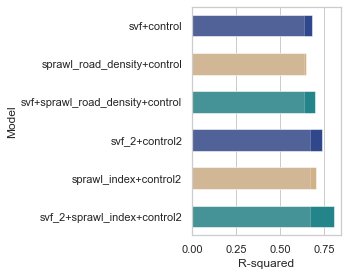

In [23]:
# create a horizontal bar plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 4))
gap = 0.3
sns.barplot(data=result_plot, 
            ax=ax, 
            orient='h', 
            palette=[color_schema[col] for col in result_plot.columns],
            linewidth=0.5,
            gap = gap
            )
sns.barplot(data = result_base, 
            ax=ax, orient='h', 
            color = 'lightgrey',
            gap = gap,
            alpha = 0.2)
ax.set_xlabel('R-squared')
ax.set_ylabel('Model')
# save the fig
fig.savefig(f"{GRAPHIC_PATH}/cluster_figure.svg", format='svg', dpi=300)